<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Copia_de_Pr%C3%A1ctica_1_Fundamentos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, introduce tu número de cuenta: 318245915


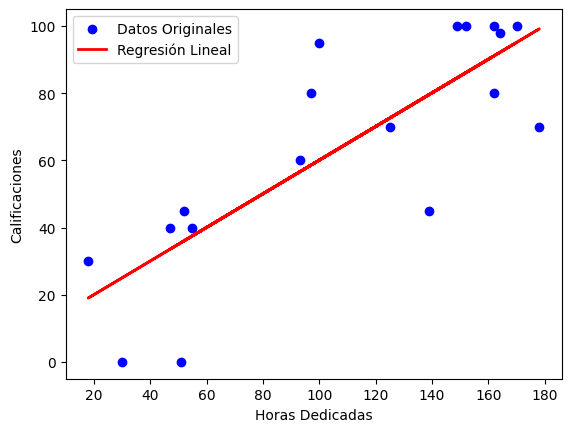

Estadísticas para Horas Dedicadas:
count     20.000000
mean      99.400000
std       58.129076
min        2.000000
25%       50.000000
50%       98.500000
75%      154.500000
max      178.000000
Name: horas_dedicadas, dtype: float64

Estadísticas para Calificaciones Obtenidas:
count     18.000000
mean      64.055556
std       33.539217
min        0.000000
25%       41.250000
50%       70.000000
75%       97.250000
max      100.000000
Name: calificaciones_obtenida, dtype: float64

Predicción de Calificación para 38 horas dedicadas: 29.015026886013963

RMSE (Error Cuadrático Medio): 19.107775691813174
Coeficiente de Determinación (R^2): 0.6563328585151595


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Cargar los datos desde el archivo datos.csv
data = pd.read_csv('datos.csv')

# Crear un DataFrame con los datos proporcionados
# Estadísticas descriptivas para horas dedicadas
horas_stats = data['horas_dedicadas'].describe()

# Eliminar filas con calificaciones faltantes
data = data.dropna(subset=['calificaciones_obtenida'])

# Estadísticas descriptivas para calificaciones obtenidas
calificaciones_stats = data['calificaciones_obtenida'].describe()

# Análisis de regresión lineal
X = data['horas_dedicadas'].values.reshape(-1, 1)
y = data['calificaciones_obtenida'].values

# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)

# Predecir calificaciones basadas en horas dedicadas
numero_cuenta = input("Por favor, introduce tu número de cuenta: ")
n = sum(map(int, str(numero_cuenta))) % 50  # Suma de dígitos módulo 50

# Predecir calificaciones basadas en horas dedicadas
prediccion_calificacion = modelo_regresion.predict(np.array([[n]]))

# Estadísticas del modelo de regresión
rmse = sqrt(mean_squared_error(y, modelo_regresion.predict(X)))
r2 = r2_score(y, modelo_regresion.predict(X))

# Gráfico de regresión lineal
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, modelo_regresion.predict(X), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Calificaciones')
plt.legend()
plt.show()

# Imprimir resultados
print("Estadísticas para Horas Dedicadas:")
print(horas_stats)
print("\nEstadísticas para Calificaciones Obtenidas:")
print(calificaciones_stats)
print("\nPredicción de Calificación para", n, "horas dedicadas:", prediccion_calificacion[0])
print("\nRMSE (Error Cuadrático Medio):", rmse)
print("Coeficiente de Determinación (R^2):", r2)


• Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos.


Vamos a interpretar estos resultados, es decir, la predicción de calificación para 38 horas dedicadas:

*   La predicción de calificación para 38 horas dedicadas es de aproximadamente 29. Esto significa que según el modelo de regresión, se espera que un estudiante que haya dedicado 38 horas a la materia obtenga una calificación cercana a 29.

*   RMSE (Error Cuadrático Medio): el RMSE es una medida de qué tan bien se ajustan las predicciones del modelo a los valores reales. En este caso, el RMSE es de aproximadamente 19.1. Como regla general, cuanto menor sea el RMSE, mejor será el ajuste del modelo. Aquí, un RMSE de 19.1 indica que las predicciones del modelo tienen un error promedio de aproximadamente 19.1 unidades respecto a los valores reales.

*   Coeficiente de Determinación (R^2): el coeficiente de determinación, también conocido como R^2, es una medida de cuánta variabilidad de los datos es explicada por el modelo. En este caso, el R^2 es aproximadamente 0.656. Un R^2 cercano a 1 indica un buen ajuste del modelo, ya que indica que el modelo explica aproximadamente el 65.6% de la variabilidad de los datos.


Dado estos resultados, podemos interpretar que el modelo de regresión tiene un desempeño moderado. La predicción para 38 horas dedicadas es baja, lo cual podría indicar que el modelo subestima las calificaciones para este rango de horas dedicadas. El RMSE indica que las predicciones tienen un error promedio moderado, mientras que el coeficiente de determinación sugiere que el modelo explica una cantidad significativa de la variabilidad de los datos, pero aún queda margen de mejora. En general, el modelo podría ser útil como una guía aproximada, pero podría mejorarse con más datos o con un modelo más sofisticado.